In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from dmp.dmp import DMPs_cartesian
from dmp.obstacle_superquadric import Obstacle_Dynamic as sq_dyn

In [3]:
from DMP_map_Rotation import rotation_matrix_from_vectors, tra_map_param, tra_map_forward, tra_map_inverse
from Minimal_Ellipsoid import rotate_ellipsoid, draw_ellipsoid,find_minimum_volume_ellipsoid

Rotation Matrix R:
 [[-1.0000000e+00  0.0000000e+00  1.2246468e-16]
 [ 0.0000000e+00  1.0000000e+00  0.0000000e+00]
 [-1.2246468e-16  0.0000000e+00 -1.0000000e+00]]
inverse map [ 1.2246468e-16  0.0000000e+00 -1.0000000e+00]
tra_new: [[ 0.          0.          0.        ]
 [ 0.0849818   0.08761927  0.56376256]
 [-0.16894332  0.14912292  0.29254768]
 [ 1.          1.          1.        ]]
tra_origin [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.20000000e+00  1.00000000e+00 -7.04245728e-16]
 [ 1.00000000e+00 -1.18511224e-16 -2.29970687e-16]
 [ 2.00000000e+00  3.00000000e+00  3.00000000e+00]]
tra_origin_element [ 1.20000000e+00  1.00000000e+00 -7.21644966e-16]


In [4]:
import copy

In [5]:
# Trajectory 1
# goal_move_to_peg = np.array([0.488574563751,
#                             -0.184923096437,
#                             0.262908357465])

# goal_move_to_ring = np.array([0.505577739181,
#                               0.310174815877,
#                               0.045214734967])

# x0_move_to_peg = goal_move_to_ring

# x0_move_to_ring = np.array([0.307, 0, 0.483])



In [6]:
# #DMP Ini
# K=1050.0
# alpha_s = 4.0
# tol=0.01

# MP = DMPs_cartesian(K=K, alpha_s=alpha_s, tol=tol)

In [7]:
# #DMP evolution
# MP.x_0=x0_move_to_ring
# MP.x_goal=goal_move_to_ring
# MP.reset_state()
# x_track_static_toring = np.array([MP.x_0])
# flag_conv = False
# while not flag_conv:
#     MP.step()
#     x_track_static_toring = np.append(x_track_static_toring, np.array([MP.x]), axis=0)
#     flag_conv = np.linalg.norm(MP.x - MP.x_goal) < MP.tol

In [8]:
# #DMP 3D plot
# fig=plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(x_track_static_toring[:, 0], x_track_static_toring[:, 1], x_track_static_toring[:, 2],'-k', linewidth=1.5)

In [9]:
# Trajectory 2
# Trajectory
t_des = np.linspace(0.0, 1.0, 1000)

## cos/sin tra
gamma = np.transpose(
    [np.cos(np.pi * t_des),
    np.sin(np.pi * t_des),
    t_des ])

gamma2 = np.transpose(
    [np.cos(np.pi * t_des),
    1-np.sin(np.pi * t_des),
    t_des] )

# # gamma2 = np.transpose(
# #     [np.cos(np.pi * t_des),
# #     1-0.2*np.sin(np.pi * t_des),
# #     t_des * 0.5])

# gamma2 = np.transpose(
#     [np.cos(np.pi * t_des),
#     1-0*t_des,
#     t_des * 0.5])

# straight line tra

# gamma=np.transpose(
#     [t_des,
#      t_des,
#      0.5*t_des])
    
# gamma2=np.transpose(
#     [t_des,
#      1-t_des,
#      0.5*t_des])


In [10]:

# random generate trajectory
dim_constrain=[-0.5,1.5,0.8,1.2,0.8,1.2]
dist_thres=0.6


def sample_two_points(dim_constrain, dist_thres):
    xmin, xmax, ymin, ymax, zmin, zmax = dim_constrain

    def sample_point():
        x = np.random.uniform(xmin, xmax)
        y = np.random.uniform(ymin, ymax)
        z = np.random.uniform(zmin, zmax)
        return np.array([x, y, z])

    def distance(point1, point2):
        return np.linalg.norm(point1 - point2)

    while True:
        point1 = sample_point()
        point2 = sample_point()
        if distance(point1, point2) > dist_thres:
            return point1, point2

# goal1,goal2=sample_two_points(dim_constrain, dist_thres)

# gamma=np.transpose(
#     [np.linspace(0.0, goal1[0], 1000),
#      np.linspace(0.0, goal1[1], 1000),
#      np.linspace(0.0, goal1[2], 1000)])
    
# gamma2=np.transpose(
#     [np.linspace(1.0, goal2[0], 1000),
#      np.linspace(0.0, goal2[1], 1000),
#      np.linspace(0.0, goal2[2], 1000)])


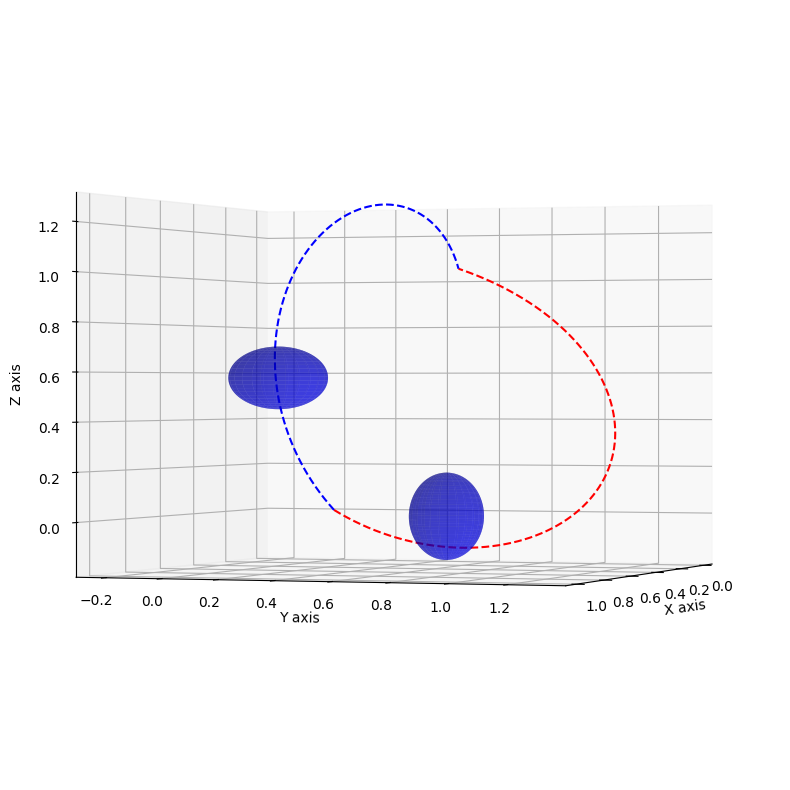

In [11]:
alpha1,T1,R1=tra_map_param(gamma)
gamma_map=tra_map_forward(gamma, alpha1, T1, R1)

alpha2,T2,R2=tra_map_param(gamma2)
gamma2_map=tra_map_forward(gamma2, alpha2, T2, R2)

center_e1=np.array([0.5,0.5,0.5])
axes_e1=np.array([0.2,0.1,0.15])

center_e2=np.array([0.5,0.5,0.5])
axes_e2=np.array([0.2,0.1,0.15])

center_e1_,axes_e1_,points1=rotate_ellipsoid(center_e1, axes_e1, alpha1,T1, R1)
center_e2_,axes_e2_,points2=rotate_ellipsoid(center_e2, axes_e2, alpha2,T2, R2)

fig=plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(gamma_map[:, 0], gamma_map[:, 1], gamma_map[:, 2],'--r', linewidth=1.5)
ax.plot(gamma2_map[:, 0], gamma2_map[:, 1], gamma2_map[:, 2],'--b', linewidth=1.5)

draw_ellipsoid(ax, center_e1_, axes_e1_, num_points=100, color='b', alpha=0.5)
draw_ellipsoid(ax, center_e2_, axes_e2_, num_points=100, color='b', alpha=0.5)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

ax.view_init(elev=0, azim=20)





In [12]:
print(center_e1_)
print(center_e2_)

(0.3077786865811055, 0.5960344951191432, -0.00381278769699487)
(0.3392280979363571, -0.017684274091383023, 0.5784561807135865)


In [13]:
#DMP Ini
K=1050.0
alpha_s = 4.0
tol=0.01
dt=0.01

MP = DMPs_cartesian(K=K, alpha_s=alpha_s, tol=tol)
MP2= DMPs_cartesian(K=K, alpha_s=alpha_s, tol=tol)

In [14]:
#DMP try
# MP.imitate_path(t_des=t_des, x_des=gamma)
# MP2.imitate_path(t_des=t_des, x_des=gamma2)

MP.imitate_path(t_des=t_des, x_des=gamma_map)
MP2.imitate_path(t_des=t_des, x_des=gamma2_map)



gamma_, _, _, _ = MP.rollout()
gamma2_, _, _, _ = MP2.rollout()
t_des_ = np.linspace(0.0, 1.0, np.shape(gamma)[0])



In [15]:
MP.x_0 = gamma_[0]
MP.x_goal = gamma_[-1]

MP2.x_0 = gamma2_[0]
MP2.x_goal = gamma2_[-1]

MP.reset_state()
MP2.reset_state()
# gamma_tra = np.array([gamma[0]])
# gamma2_tra= np.array([gamma2[0]])

gamma_tra = np.array([gamma[0]])
gamma2_tra= np.array([gamma2[0]])

In [16]:
# Link obstacle

# Initialize the dictionary
data_dict = {}
velocity_dict = {}

# Define the number of links
num_links = 2  # Adjust this number as needed

# Populate the dictionary
for i in range(1, num_links + 1):
    # Create a 6x3 array with some example data
    array_data = np.array([[0.2, 0.0, 0.0], [-0.2, 0, 0], [0.0, 0.1, 0.0], [0.0, -0.1, 0.0], [0.0, 0.0, -0.15], [0.0,0.0,0.15]])+\
    np.array([0.5,0.5,0.5])
    
    # Add the array to the dictionary with the key 'link{i}_p'
    data_dict[f'link{i}'] = array_data
    velocity_dict[f'link{i}']=np.array([0.01,0.0,0.0])

data_dict['link1'] = np.array([[ 0.6625  , -0.5     ,  0.089159],
       [ 0.3375  , -0.5     ,  0.089159],
       [ 0.5     , -0.351   ,  0.089159],
       [ 0.5     , -0.649   ,  0.089159],
       [ 0.5     , -0.5     ,  0.238159],
       [ 0.5     , -0.5     , -0.059841]])
# Example: Print the dictionary
for key, value in data_dict.items():
    print(f"{key}:")
    print(value)


data_dict_agent1=copy.deepcopy(data_dict)
data_dict_agent2=copy.deepcopy(data_dict)

velocity_dict_agent1=copy.deepcopy(velocity_dict)
velocity_dict_agent2=copy.deepcopy(velocity_dict)

link1:
[[ 0.6625   -0.5       0.089159]
 [ 0.3375   -0.5       0.089159]
 [ 0.5      -0.351     0.089159]
 [ 0.5      -0.649     0.089159]
 [ 0.5      -0.5       0.238159]
 [ 0.5      -0.5      -0.059841]]
link2:
[[0.7  0.5  0.5 ]
 [0.3  0.5  0.5 ]
 [0.5  0.6  0.5 ]
 [0.5  0.4  0.5 ]
 [0.5  0.5  0.35]
 [0.5  0.5  0.65]]


In [17]:
def Map_Link_Data(data_dict_agent1,data_dict_agent2,velocity_dict_agent1,velocity_dict_agent2):
# Create empty dictionaries to store results
    Center_dict_agent1 = {}
    Axes_dict_agent1 = {}
    Vel_dict_agent1 ={}
    
    Center_dict_agent2 = {}
    Axes_dict_agent2 = {}
    Vel_dict_agent2 ={}
    
    # Use enumerate to iterate over the items in x
    for i in range(1,num_links+1):
        key=f'link{i}'
        
        #calculate mapped ellipsoid geometry of agent1
        center, axes, _ = find_minimum_volume_ellipsoid(data_dict_agent1[key])
        #map to the related coordination 
        center_map,axes_map,_ = rotate_ellipsoid(center, axes, alpha2,T2, R2)
        #calculate mapped ellipsoid velocity
        velocity=velocity_dict_agent1[key]
        velocity_map=alpha2 *R2 @ velocity
        velocity_map = velocity_map.T
    
        Center_dict_agent1[key]=center_map
        Axes_dict_agent1[key]=axes_map
        Vel_dict_agent1[key]=velocity_map
    
    
        #calculate mapped ellipsoid geometry of agent2
        center, axes, _ = find_minimum_volume_ellipsoid(data_dict_agent2[key])
        #map to the related coordination 
        center_map,axes_map,_ = rotate_ellipsoid(center, axes, alpha1,T1, R1)
        #calculate mapped ellipsoid velocity
        velocity=velocity_dict_agent2[key]
        velocity_map=alpha1 *R1 @ velocity
        velocity_map = velocity_map.T
    
        Center_dict_agent2[key]=center_map
        Axes_dict_agent2[key]=axes_map
        Vel_dict_agent2[key]=velocity_map

    return Center_dict_agent1, Axes_dict_agent1, Vel_dict_agent1, Center_dict_agent2, Axes_dict_agent2, Vel_dict_agent2
    

Center_dict_agent1, Axes_dict_agent1, Vel_dict_agent1, Center_dict_agent2, Axes_dict_agent2, Vel_dict_agent2=\
Map_Link_Data(data_dict_agent1,data_dict_agent2,velocity_dict_agent1,velocity_dict_agent2)

# Print the result
print("Center_dict_agent1:", Center_dict_agent1)
print("Axes_dict_agent1:", Axes_dict_agent1)
print("Vel_dict_agent1:", Vel_dict_agent1)

print("Center_dict_agent2:", Center_dict_agent2)
print("Axes_dict_agent2:", Axes_dict_agent2)
print("Vel_dict_agent2:", Vel_dict_agent2)

Center_dict_agent1: {'link1': (-0.15563497101206533, -0.35477708688622617, 1.1639074580194353), 'link2': (0.3392280091161358, -0.017684756346209373, 0.5784565856656637)}
Axes_dict_agent1: {'link1': (0.11378534565792635, 0.14362533256682114, 0.10687691299025881), 'link2': (0.11325610949684979, 0.17805346103740496, 0.13311268650896532)}
Vel_dict_agent1: {'link1': array([-0.00130386, -0.00608842, -0.00460772]), 'link2': array([-0.00130386, -0.00608842, -0.00460772])}
Center_dict_agent2: {'link1': (0.2565455547929581, -0.08451746676378212, 0.48146731197082565), 'link2': (0.30777830357923414, 0.596035723401234, -0.003814425212229327)}
Axes_dict_agent2: {'link1': (0.11358547598779573, 0.10977931397811663, 0.1376555197108929), 'link2': (0.11194250270961344, 0.12658268676519246, 0.18343823893873837)}
Vel_dict_agent2: {'link1': array([-0.00139273, -0.0043541 , -0.00625317]), 'link2': array([-0.00139273, -0.0043541 , -0.00625317])}


In [18]:
# Define potential field parameters
Potential_Params=[6.74889222, 1.14757768, 0.55025244]
dyn_lambda = Potential_Params[0]
dyn_eta = Potential_Params[1]
dyn_beta = Potential_Params[2]

#default value
# dyn_lambda = 10.0
# dyn_eta = 1.0
# dyn_beta = 1.0/2

# obstacle
# sin obstacle
# center_e=np.array([0.0,1.0,0.25])
# axes_e=np.array([0.2,0.1,0.15])
# v_e = np.array([0.0,0.0,0.0])

In [19]:
# Potential Field
Ellipsoid_dict_agent1={}
Ellipsoid_dict_agent2={}

for i in range(1, num_links+1):
    center_map=Center_dict_agent1[f"link{i}"]
    axes_map=Axes_dict_agent1[f"link{i}"]
    Ellipsoid_dict_agent1[f"link{i}"]=sq_dyn(center=center_map, axis=axes_map, coeffs=np.array([1,1,1]), lmbda=dyn_lambda, beta=dyn_beta, eta=dyn_eta)


    center_map=Center_dict_agent2[f"link{i}"]
    axes_map=Axes_dict_agent2[f"link{i}"]
    Ellipsoid_dict_agent2[f"link{i}"]=sq_dyn(center=center_map, axis=axes_map, coeffs=np.array([1,1,1]), lmbda=dyn_lambda, beta=dyn_beta, eta=dyn_eta)

In [20]:
# print(Ellipsoid_dict_agent1['link1'].center)
# print('Go in Function')
def Update_link_Data(Center_dict_agent1, Axes_dict_agent1, Vel_dict_agent1, Center_dict_agent2, Axes_dict_agent2, Vel_dict_agent2):
    print('Arm Info Update')
    for i in range(1,num_links+1):
        key=f'link{i}'
        Ellipsoid_dict_agent1[key].center=Center_dict_agent1[key]
        # print(Ellipsoid_dict_agent1[key].center)
        # Ellipsoid_dict_agent1[key].center=np.array([0,0,0])
        Ellipsoid_dict_agent1[key].axis=Axes_dict_agent1[key]
        Ellipsoid_dict_agent2[key].center=Center_dict_agent2[key]
        Ellipsoid_dict_agent2[key].axis=Axes_dict_agent2[key]


# Update_link_Data(Center_dict_agent1, Axes_dict_agent1, Vel_dict_agent1, Center_dict_agent2, Axes_dict_agent2, Vel_dict_agent2)
# print(Ellipsoid_dict_agent1['link1'].center)

In [21]:
# # cos obstacle
center_e=np.array([0.5,0.5,0.5])
axes_e=np.array([0.2,0.1,0.15])
v_e = np.array([0.0,0.0,0.0])

#agent world coordinates
center_agent1=np.array(MP.x_0)
center_agent2=np.array(MP2.x_0)

# # map ellipsoid obstacle to local coordinates
# center_e1_map,axes_e1_map,_=rotate_ellipsoid(center_e, axes_e, alpha1,T1, R1)
# center_e2_map,axes_e2_map,_=rotate_ellipsoid(center_e, axes_e, alpha2,T2, R2)


#map agent back to the original world coordination
center_agent1_origin=tra_map_inverse(center_agent1, alpha1, T1, R1)
center_agent2_origin=tra_map_inverse(center_agent2, alpha2, T2, R2)

#map agent to their corresponding world coordination
center_agent1_map=tra_map_forward(center_agent1_origin,alpha2, T2, R2)
center_agent2_map=tra_map_forward(center_agent2_origin,alpha1, T1, R1)


axes_agent=np.array([0.05,0.05,0.05])

v_agent1=np.array([0.0,0.0,0.0])
v_agent2=np.array([0.0,0.0,0.0])




# agent1_obst_dynamic = sq_dyn(center=center_e1_map, axis=axes_e1_map, coeffs=np.array([1,1,1]), lmbda=dyn_lambda, beta=dyn_beta, eta=dyn_eta)
# agent2_obst_dynamic = sq_dyn(center=center_e2_map, axis=axes_e2_map, coeffs=np.array([1,1,1]), lmbda=dyn_lambda, beta=dyn_beta, eta=dyn_eta)
agent1_dynamic= sq_dyn(center=center_agent2, axis=alpha1*axes_agent, coeffs=np.array([1,1,1]), lmbda=dyn_lambda, beta=dyn_beta, eta=dyn_eta)
agent2_dynamic= sq_dyn(center=center_agent1, axis=alpha2*axes_agent, coeffs=np.array([1,1,1]), lmbda=dyn_lambda, beta=dyn_beta, eta=dyn_eta)


In [22]:
# # ellipsoid info update
# # Input: 6 Points for 7 links, Velocity of mass center
# for points in link_point_set:
#     center, axes, _ = find_minimum_volume_ellipsoid(points)
#     center_map,axes_map,_ = rotate_ellipsoid(center, axes, alpha1,T1, R1)
#     velocity_map = alpha1*R @ velocity
#     velocity_map = velocity_map.T
    


In [23]:
def perturb_dynamic_agent1(x, v):    
    out =  agent1_dynamic.gen_external_force(x,v-v_agent2)
    for i in range(1, num_links+1):
        key=f'link{i}'
        out+=Ellipsoid_dict_agent2[key].gen_external_force(x, v-Vel_dict_agent2[key])
    # print(out)
    return out

In [24]:
def perturb_dynamic_agent2(x, v):
    out = agent2_dynamic.gen_external_force(x, v-v_e)
    for i in range(1, num_links+1):
        key=f'link{i}'
        out+=Ellipsoid_dict_agent1[key].gen_external_force(x, v-Vel_dict_agent1[key])
    return out

In [25]:
# Plot Ellipsoid
# Define the ellipsoid parameters
a = axes_e[0] # Semi-axis length in the x-direction
b = axes_e[1]  # Semi-axis length in the y-direction
c = axes_e[2]  # Semi-axis length in the z-direction

# Create a grid of values for theta and phi
theta = np.linspace(0, 2 * np.pi, 20)
phi = np.linspace(0, np.pi, 10)
theta, phi = np.meshgrid(theta, phi)

# Parametric equations for the ellipsoid
x = a * np.sin(phi) * np.cos(theta) + center_e[0]
y = b * np.sin(phi) * np.sin(theta) + center_e[1]
z = c * np.cos(phi) + center_e[2]

In [26]:
#DMP 3D plot
def plotresult():
    fig=plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(gamma[:, 0], gamma[:, 1], gamma[:, 2],'--k', linewidth=1.5)
    ax.plot(gamma2[:, 0], gamma2[:, 1], gamma2[:, 2],'--k', linewidth=1.5)
    # ax.plot(gamma[:, 0], gamma[:, 1], gamma[:, 2],'-g', linewidth=1.5)
    ax.plot(gamma_tra[:, 0], gamma_tra[:, 1], gamma_tra[:, 2],'-r', linewidth=1.5)
    ax.plot(gamma2_tra[:, 0], gamma2_tra[:, 1], gamma2_tra[:, 2],'-r', linewidth=1.5)
    ax.plot_surface(x, y, z, color='b', alpha=0.3, edgecolor=(0, 0, 0, 0.1))  # Use alpha for transparency
    # ax.plot_surface(x_, y_, z_, color='r', alpha=0.3, edgecolor=(0, 0, 0, 0.1))  # Use alpha for transparency
    
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    ax.view_init(elev=0, azim=90)
    
    # Manually adjust the subplot margins
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.draw()         # Redraw the current figure
    plt.pause(0.1) 

In [27]:
plt.ion()

flag_conv = False
flag_conv2 = False
total_time=0.0
print("dt:",dt)

while not (flag_conv and flag_conv2):
    # obst_dynamic.center=obst_dynamic.center+v_e*dt
    total_time += dt
    
    # close_flag= np.linalg.norm(MP.x - MP2.x)>0.2
    close_flag=True

        # Parametric equations for the ellipsoid
    # x_ = a * np.sin(phi) * np.cos(theta) + obst_dynamic.center[0]
    # y_ = b * np.sin(phi) * np.sin(theta) + obst_dynamic.center[1]
    # z_ = c * np.cos(phi) + obst_dynamic.center[2]
    Center_dict_agent1, Axes_dict_agent1, Vel_dict_agent1, Center_dict_agent2, Axes_dict_agent2, Vel_dict_agent2=\
Map_Link_Data(data_dict_agent1,data_dict_agent2,velocity_dict_agent1,velocity_dict_agent2)
    Update_link_Data(Center_dict_agent1, Axes_dict_agent1, Vel_dict_agent1, Center_dict_agent2, Axes_dict_agent2, Vel_dict_agent2)


    
    

    if not close_flag:
        print("agent1 stop")

    if (not flag_conv) and close_flag:
        # apply potential field
        MP.step(external_force=perturb_dynamic_agent1)
        flag_conv = np.linalg.norm(MP.x - MP.x_goal) < MP.tol
        # Map coordinations
        center_agent1_origin=tra_map_inverse(np.array(MP.x), alpha1, T1, R1)
        center_agent1_map=tra_map_forward(center_agent1_origin,alpha2, T2, R2)
        agent2_dynamic.center=center_agent1_map

        # print(R1.T@ (np.array(MP.dx)/alpha1).T)
        # print(R1.T@ (np.array(MP.dx)/alpha1).T)
    
        v_agent1=alpha2*R2@(R1.T@ (np.array(MP.dx)/alpha1).T)
        v_agent1=v_agent1.T
    

        #store trajecory in world map
        gamma_tra = np.append(gamma_tra, np.array([center_agent1_origin]), axis=0)
        # print(gamma_tra)


    

    

    if not flag_conv2:
        # apply potential field
        MP2.step(external_force=perturb_dynamic_agent2)
        flag_conv2 = np.linalg.norm(MP2.x - MP2.x_goal) < MP2.tol
        # Map coordinations
        center_agent2_origin=tra_map_inverse(np.array(MP2.x), alpha2, T2, R2)
        center_agent2_map=tra_map_forward(center_agent2_origin,alpha1, T1, R1)
        agent1_dynamic.center=center_agent2_map
    
        v_agent2=alpha1*R1@(R2.T@ (np.array(MP2.dx)/alpha2).T)
        v_agent2=v_agent2.T
        #store trajecory in world map
        gamma2_tra = np.append(gamma2_tra, np.array([center_agent2_origin]), axis=0)
        # print(gamma2_tra)


    if flag_conv:
        print("agent1 achieve goal")

    if flag_conv2:
        print("agent2 achieve goal")
    
    # plotresult()


print(total_time)
    

dt: 0.01
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update


/home/siddharth/Research/Dual_Arm/DMP/dmp/obstacle_superquadric.py:121: RuntimeWarning: invalid value encountered in scalar divide
  cos_theta = np.dot(nabla, v) / np.linalg.norm(v) / np.linalg.norm(nabla)
/home/siddharth/Research/Dual_Arm/DMP/dmp/obstacle_superquadric.py:148: RuntimeWarning: invalid value encountered in divide
  nabla_norm_nabla_C /= norm_nabla_C
/home/siddharth/Research/Dual_Arm/DMP/dmp/obstacle_superquadric.py:154: RuntimeWarning: invalid value encountered in scalar power
  C_x ** (- self.eta) * \
/home/siddharth/Research/Dual_Arm/DMP/dmp/obstacle_superquadric.py:153: RuntimeWarning: invalid value encountered in scalar power
  phi = - self.lmbda * norm_v * (-cos_theta) ** (self.beta - 1.0) * \


Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info Update
Arm Info

In [28]:
# A=np.array(gamma_tra)
# B=np.array(gamma2_tra)
# print(np.shape(A))
# print(np.shape(B))
# print(np.shape(gamma_))
# print(np.shape(gamma2_))


In [29]:
# nsize=np.shape(gamma2_)
# delta_tra=gamma_tra[0:nsize[0],:]-gamma_[0:nsize[0],:]
# print(delta_tra)

In [30]:
# gamma_tra[-1]

In [31]:
# def my_function():
#     print(v_e)

In [32]:
# for i in range(5):
#     my_function()
#     v_e=v_e+1

In [33]:
A=np.array([1,2])
B=np.array([A])

In [34]:
print(A)
print(B)

[1 2]
[[1 2]]


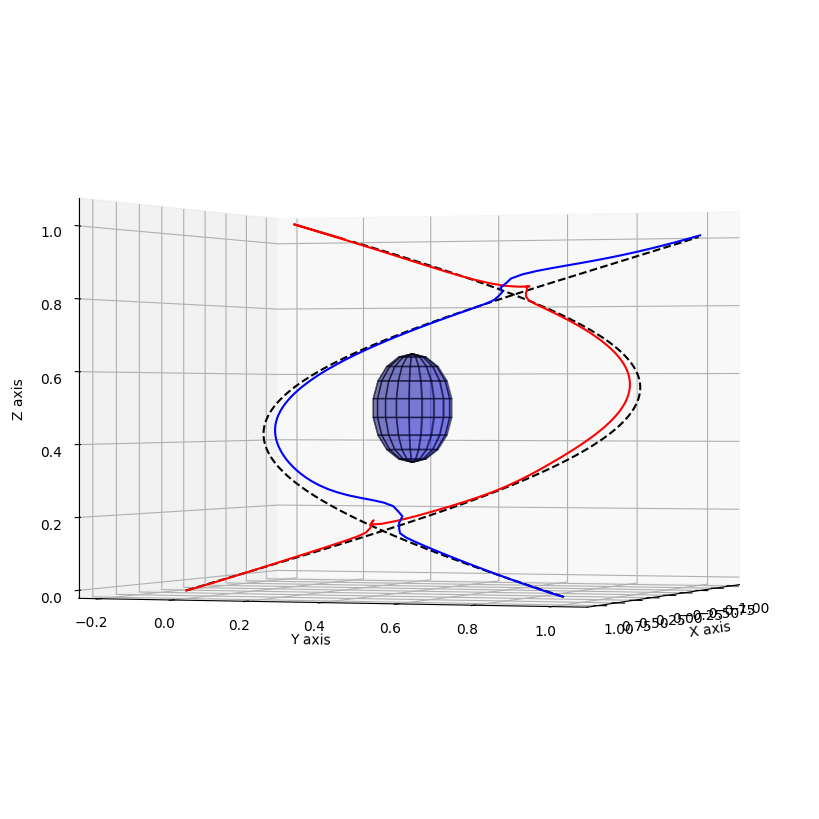

In [35]:
fig=plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(gamma[:, 0], gamma[:, 1], gamma[:, 2],'--k', linewidth=1.5)
ax.plot(gamma2[:, 0], gamma2[:, 1], gamma2[:, 2],'--k', linewidth=1.5)
# ax.plot(gamma[:, 0], gamma[:, 1], gamma[:, 2],'-g', linewidth=1.5)
ax.plot(gamma_tra[:, 0], gamma_tra[:, 1], gamma_tra[:, 2],'-r', linewidth=1.5)
ax.plot(gamma2_tra[:, 0], gamma2_tra[:, 1], gamma2_tra[:, 2],'-b', linewidth=1.5)
ax.plot_surface(x, y, z, color='b', alpha=0.3, edgecolor=(0, 0, 0, 0.1))  # Use alpha for transparency
# ax.plot_surface(x_, y_, z_, color='r', alpha=0.3, edgecolor=(0, 0, 0, 0.1))  # Use alpha for transparency

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

ax.view_init(elev=-0, azim=20)

# Manually adjust the subplot margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.draw()         # Redraw the current figure
plt.pause(0.1) 

In [36]:
print(flag_conv)
print(flag_conv2)

True
True


In [37]:
gamma_tra[-1]

array([-0.9984669 , -0.02364614,  1.00751004])

In [38]:
if False:
    print("hello")

In [39]:
A=np.array([1,2,3])
print(A.ndim)
A.reshape(1,-1)

1


array([[1, 2, 3]])

In [40]:
A

array([1, 2, 3])

In [41]:
np.array([-1,-1,1])+np.array([[0,0,0],[1,1,100]])

array([[ -1,  -1,   1],
       [  0,   0, 101]])

In [42]:
A = np.array([[1, 1, 1], [-2, 0, 3], [100, 100, 100]])
# Calculate the squared norm for each row
squared_norms = np.sum(np.square(A), axis=1)

# Calculate the root of each squared norm
rms_errors = np.sqrt(squared_norms)

# Calculate the total RMSE by summing individual RMS errors
total_rmse = np.sum(rms_errors)

print("The total RMSE of the 3D points is:", total_rmse)

The total RMSE of the 3D points is: 178.5426828399206


In [43]:
np.sum(A,axis=1)

array([  3,   1, 300])

In [44]:
np.sum([1,1,1])

3